In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-generation-data-forecasting/Location2.csv
/kaggle/input/wind-power-generation-data-forecasting/readme.txt
/kaggle/input/wind-power-generation-data-forecasting/Location3.csv
/kaggle/input/wind-power-generation-data-forecasting/Location1.csv
/kaggle/input/wind-power-generation-data-forecasting/Location4.csv


**Importing Libraries** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import warnings
import math
from colorama import Fore
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import statsmodels.api as sm

In [3]:
loc1=pd.read_csv('/kaggle/input/wind-power-generation-data-forecasting/Location1.csv')
loc2=pd.read_csv('/kaggle/input/wind-power-generation-data-forecasting/Location2.csv')
loc3=pd.read_csv('/kaggle/input/wind-power-generation-data-forecasting/Location3.csv')
loc4=pd.read_csv('/kaggle/input/wind-power-generation-data-forecasting/Location4.csv')

In [4]:
loc1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [5]:
loc2.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [6]:
loc3.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,29.7,55,15.4,4.96,8.46,124,129,8.8,0.3438
1,2017-01-02 01:00:00,29.6,56,15.6,4.97,8.43,120,124,8.5,0.3954
2,2017-01-02 02:00:00,29.8,56,16.1,5.69,9.18,121,123,9.7,0.4471
3,2017-01-02 03:00:00,29.8,58,16.8,5.49,8.88,123,126,9.9,0.4988
4,2017-01-02 04:00:00,30.2,59,17.8,5.19,8.36,124,127,9.4,0.5504


In [7]:
loc4.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922


In [8]:
loc1.describe()


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [9]:
loc2.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,42.725605,69.085091,32.215932,4.693236,7.572439,208.512626,206.555594,8.557470,0.249902
std,23.724354,17.317481,21.307625,2.238572,3.381060,103.088845,104.882857,3.710385,0.209088
min,-31.200000,16.000000,-36.200000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,26.100000,56.000000,18.600000,3.010000,5.110000,135.000000,129.000000,5.800000,0.076200
50%,42.700000,71.000000,32.000000,4.440000,7.400000,224.000000,218.000000,8.200000,0.194950
75%,63.000000,83.000000,50.600000,6.040000,9.740000,300.000000,302.000000,10.800000,0.381800
max,95.400000,100.000000,76.600000,18.270000,24.590000,360.000000,360.000000,29.000000,0.985900


In [10]:
loc3.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,49.225632,68.290708,38.225450,4.334103,7.047603,194.807100,194.897055,8.134600,0.307503
std,22.551070,17.865965,21.901316,2.061304,3.041665,101.823583,102.132837,3.661115,0.263879
min,-26.700000,12.000000,-35.500000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,32.000000,55.000000,22.800000,2.730000,4.880000,125.000000,126.000000,5.400000,0.077000
50%,50.300000,70.000000,38.100000,4.050000,6.920000,191.000000,193.000000,7.700000,0.240700
75%,68.400000,83.000000,57.900000,5.600000,8.990000,289.000000,289.000000,10.400000,0.498400
max,101.700000,100.000000,78.700000,18.530000,24.200000,360.000000,360.000000,26.600000,0.999400


In [11]:
loc4.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,46.809829,70.956621,37.054274,4.012071,6.612864,199.400731,201.359954,7.688954,0.250926
std,21.561586,16.969744,20.995804,1.887665,2.869876,96.575068,97.207775,3.458954,0.228814
min,-28.800000,9.000000,-35.600000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000
25%,30.300000,59.000000,21.900000,2.550000,4.580000,129.000000,130.000000,5.000000,0.066700
50%,47.100000,73.000000,37.100000,3.750000,6.500000,207.000000,211.000000,7.300000,0.184700
75%,65.400000,85.000000,55.300000,5.210000,8.440000,284.000000,286.000000,9.900000,0.371825
max,93.800000,100.000000,77.900000,14.260000,21.750000,360.000000,360.000000,26.400000,0.988800


In [12]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [13]:
loc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [14]:
loc1.isnull().sum()


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [15]:
loc2.isnull().sum()


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [16]:
loc3.isnull().sum()


Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [17]:
loc4.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

Tranformation

In [18]:
loc1['Time']=pd.to_datetime(loc1['Time'])
loc1['Year']=loc1['Time'].dt.year
loc1['Month']=loc1['Time'].dt.month
loc1['Quarter']=loc1['Time'].dt.quarter
loc1['Day']=loc1['Time'].dt.dayofweek

In [19]:
loc2['Time']=pd.to_datetime(loc2['Time'])
loc2['Year']=loc2['Time'].dt.year
loc2['Month']=loc2['Time'].dt.month
loc2['Quarter']=loc2['Time'].dt.quarter
loc2['Day']=loc2['Time'].dt.dayofweek


In [20]:
loc3['Time']=pd.to_datetime(loc3['Time'])
loc3['Year']=loc3['Time'].dt.year
loc3['Month']=loc3['Time'].dt.month
loc3['Quarter']=loc3['Time'].dt.quarter
loc3['Day']=loc3['Time'].dt.dayofweek


In [21]:
loc4['Time']=pd.to_datetime(loc4['Time'])
loc4['Year']=loc4['Time'].dt.year
loc4['Month']=loc4['Time'].dt.month
loc4['Quarter']=loc4['Time'].dt.quarter
loc4['Day']=loc4['Time'].dt.dayofweek


In [22]:
loc1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Quarter,Day
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,1,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1,0
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,2017,1,1,0
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,2017,1,1,0
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,2017,1,1,0


**Annova**

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Extract the 'Power' column from each dataset
loc1_power = loc1['Power']
loc2_power = loc2['Power']
loc3_power = loc3['Power']
loc4_power = loc4['Power']

# Perform One-Way ANOVA
anova_result = stats.f_oneway(loc1_power, loc2_power, loc3_power, loc4_power)

# Display ANOVA results
print(f"ANOVA F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

# Check if the result is significant (p-value < 0.05)
if anova_result.pvalue < 0.05:
    print("Significant difference found! Performing Tukey's HSD test...\n")
    
    # Create a combined dataframe for Tukey’s test
    df_tukey = pd.DataFrame({
        'Power': list(loc1_power) + list(loc2_power) + list(loc3_power) + list(loc4_power),
        'Location': (['LOC1'] * len(loc1_power)) + 
                    (['LOC2'] * len(loc2_power)) + 
                    (['LOC3'] * len(loc3_power)) + 
                    (['LOC4'] * len(loc4_power))
    })

    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(df_tukey['Power'], df_tukey['Location'], alpha=0.05)

    # Print Tukey test summary
    print(tukey)

else:
    print("No significant difference found between locations.")

ANOVA F-statistic: 3762.9068, p-value: 0.0000
Significant difference found! Performing Tukey's HSD test...

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  LOC1   LOC2  -0.1555    0.0 -0.1598 -0.1512   True
  LOC1   LOC3  -0.0979    0.0 -0.1022 -0.0936   True
  LOC1   LOC4  -0.1545    0.0 -0.1588 -0.1501   True
  LOC2   LOC3   0.0576    0.0  0.0533  0.0619   True
  LOC2   LOC4    0.001 0.9298 -0.0033  0.0054  False
  LOC3   LOC4  -0.0566    0.0 -0.0609 -0.0522   True
----------------------------------------------------


**Checking For Best Location**

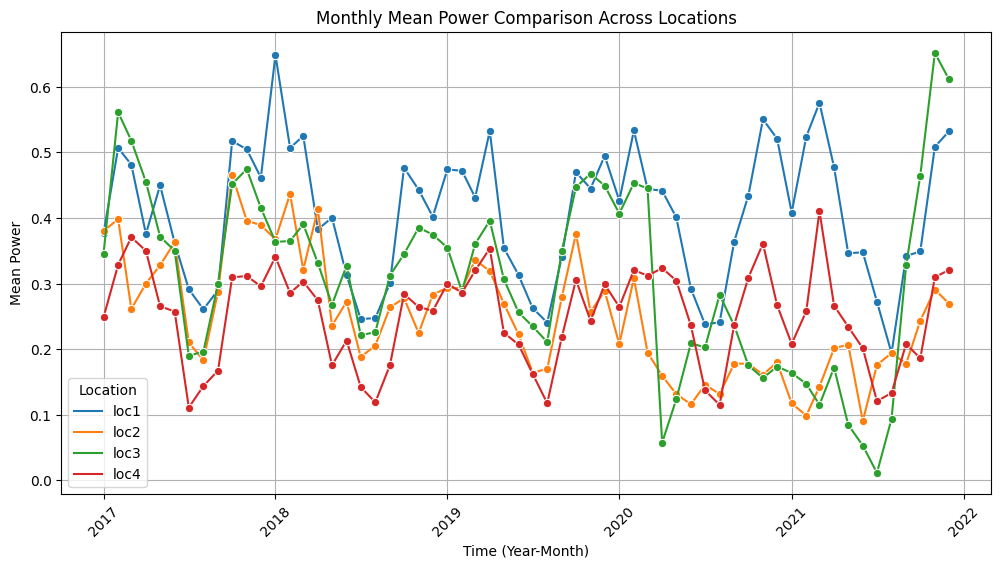

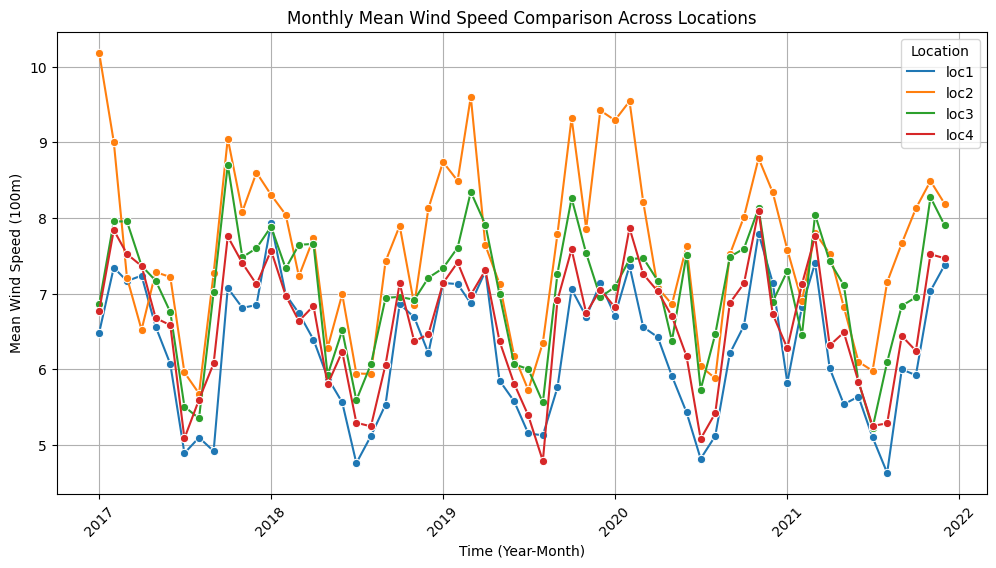

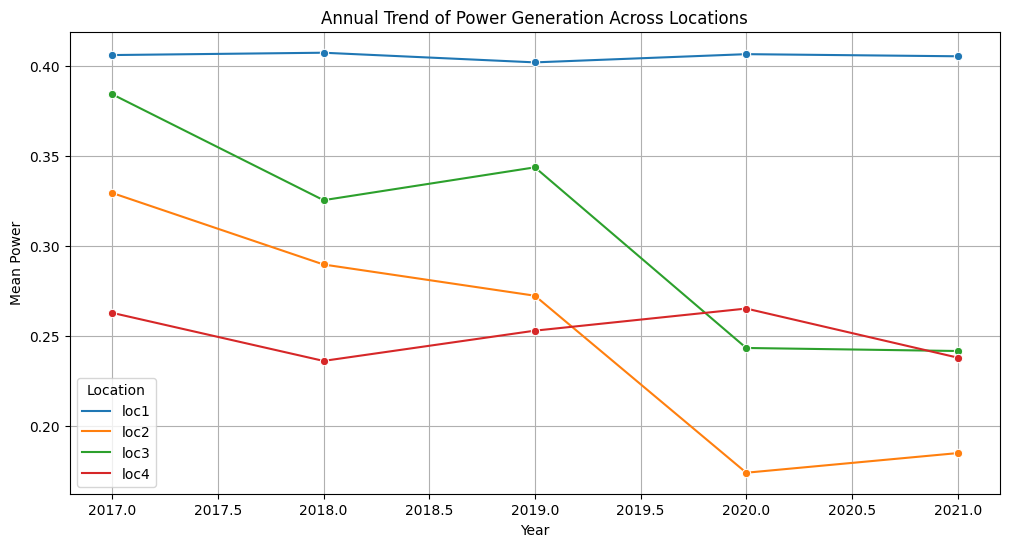

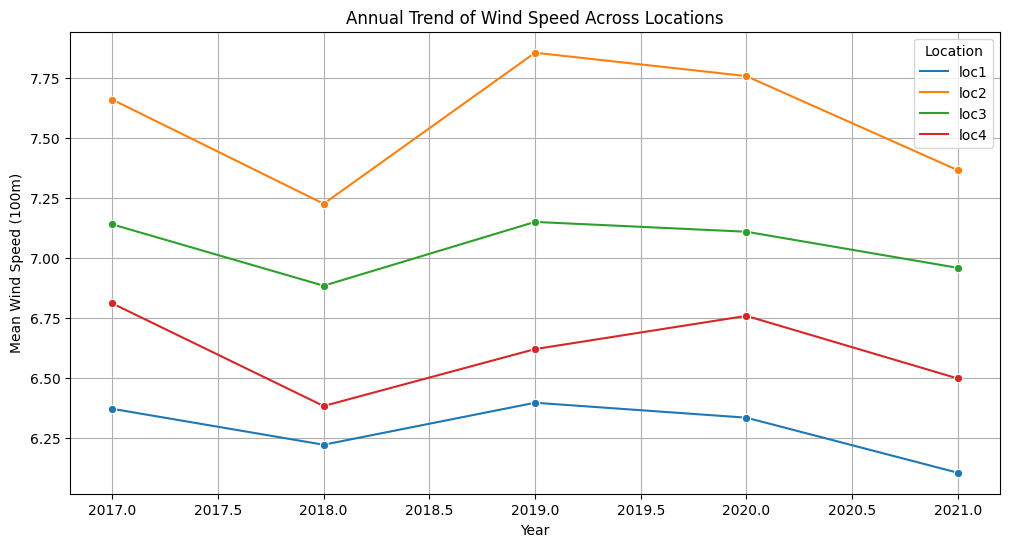

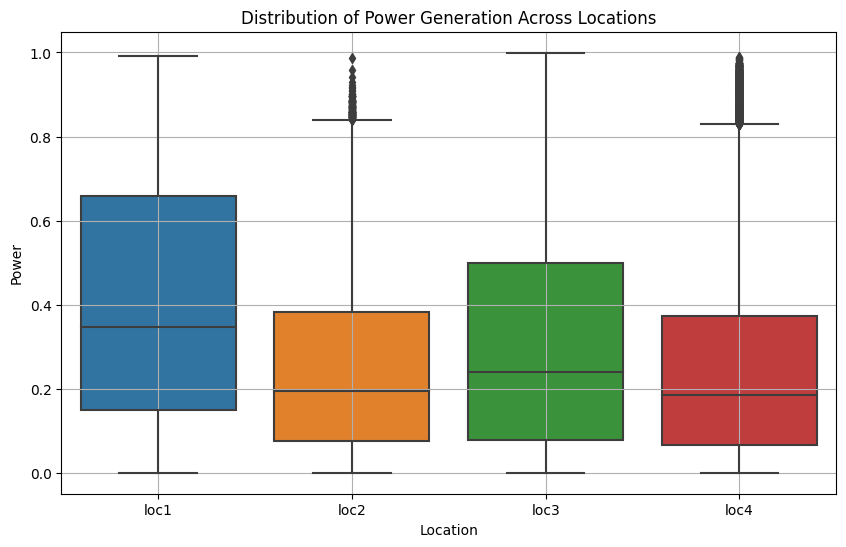

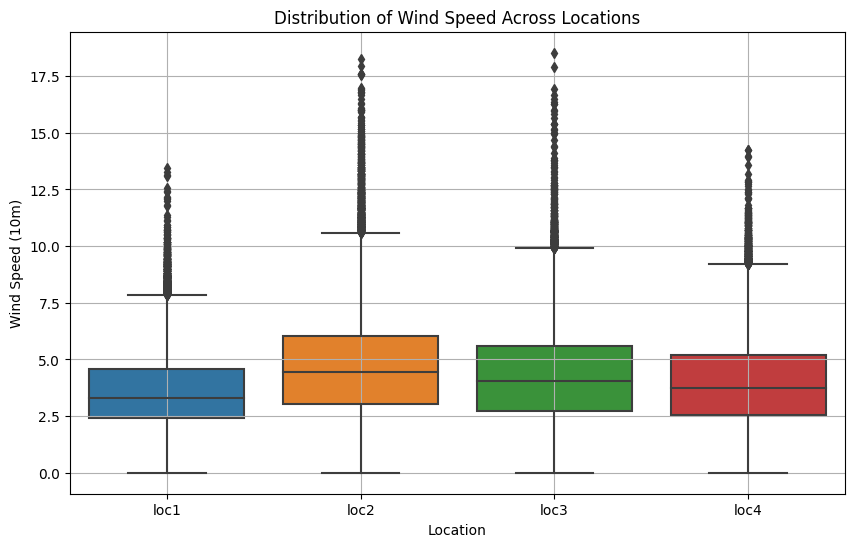

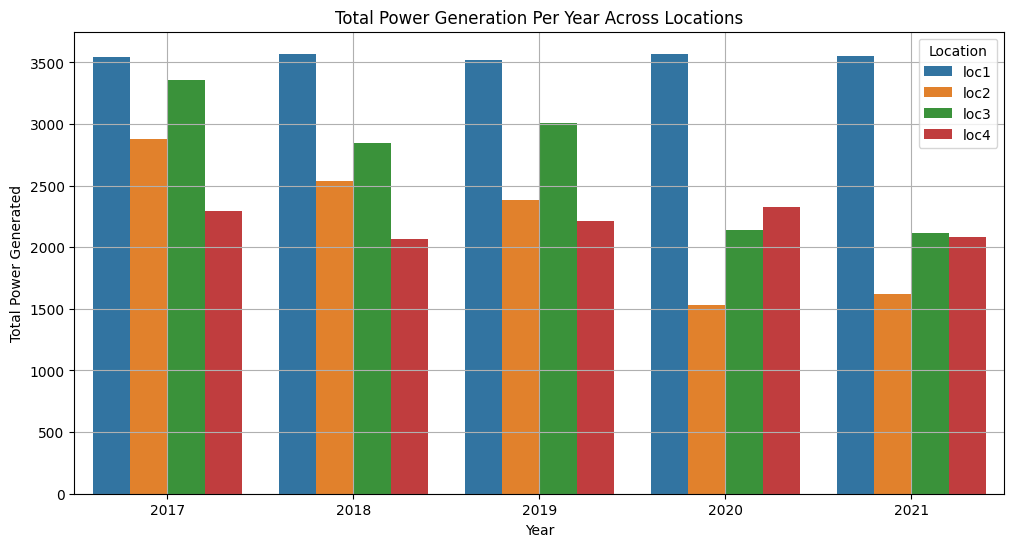

In [24]:
file_paths = {
    "loc1": "/kaggle/input/wind-power-generation-data-forecasting/Location1.csv",
    "loc2": "/kaggle/input/wind-power-generation-data-forecasting/Location2.csv",
    "loc3": "/kaggle/input/wind-power-generation-data-forecasting/Location3.csv",
    "loc4": "/kaggle/input/wind-power-generation-data-forecasting/Location4.csv"
}

# Load data from CSV files
data_frames = {}
for loc, path in file_paths.items():
    df = pd.read_csv(path)  # Read the CSV file
    df['Time'] = pd.to_datetime(df['Time'])  # Convert 'Time' column to datetime
    df['Location'] = loc  # Add location identifier
    data_frames[loc] = df

# Combine all locations into a single DataFrame
data = pd.concat(data_frames.values())

# Extract year and month for analysis
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.to_period('M')

# Compute monthly mean Power and Wind Speed for each location
monthly_means = data.groupby(['Month', 'Location'])[['Power', 'windspeed_100m']].mean().reset_index()

# Convert 'Month' back to datetime for plotting
monthly_means['Month'] = monthly_means['Month'].astype(str)
monthly_means['Month'] = pd.to_datetime(monthly_means['Month'])

# Compute annual mean Power and Wind Speed for each location
annual_means = data.groupby(['Year', 'Location'])[['Power', 'windspeed_100m']].mean().reset_index()

### === PLOTS === ###

# 1️⃣ Monthly Mean Power Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_means, x='Month', y='Power', hue='Location', marker='o')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Mean Power")
plt.title("Monthly Mean Power Comparison Across Locations")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid(True)
plt.show()

# 2️⃣ Monthly Mean Wind Speed Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_means, x='Month', y='windspeed_100m', hue='Location', marker='o')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Mean Wind Speed (100m)")
plt.title("Monthly Mean Wind Speed Comparison Across Locations")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid(True)
plt.show()

# 3️⃣ Annual Trend of Power Generation
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_means, x='Year', y='Power', hue='Location', marker='o')
plt.xlabel("Year")
plt.ylabel("Mean Power")
plt.title("Annual Trend of Power Generation Across Locations")
plt.legend(title="Location")
plt.grid(True)
plt.show()

# 4️⃣ Annual Trend of Wind Speed
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_means, x='Year', y='windspeed_100m', hue='Location', marker='o')
plt.xlabel("Year")
plt.ylabel("Mean Wind Speed (100m)")
plt.title("Annual Trend of Wind Speed Across Locations")
plt.legend(title="Location")
plt.grid(True)
plt.show()

# 5️⃣ Boxplot of Power by Location
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Location', y='Power')
plt.xlabel("Location")
plt.ylabel("Power")
plt.title("Distribution of Power Generation Across Locations")
plt.grid(True)
plt.show()

# 6️⃣ Boxplot of Wind Speed by Location
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Location', y='windspeed_10m')
plt.xlabel("Location")
plt.ylabel("Wind Speed (10m)")
plt.title("Distribution of Wind Speed Across Locations")
plt.grid(True)
plt.show()

# Compute annual sum of Power for each location
annual_sum_power = data.groupby(['Year', 'Location'])['Power'].sum().reset_index()

# Aggregate wind direction data by binning into 10-degree intervals
wind_direction_bins = list(range(0, 361, 10))  # Bin wind direction in 10-degree intervals
data['winddirection_binned'] = pd.cut(data['winddirection_100m'], bins=wind_direction_bins, include_lowest=True)

# Compute wind direction frequency for binned values
wind_direction_distribution = data.groupby('winddirection_binned').size().reset_index(name='Frequency')

### === ADDITIONAL PLOTS === ###

# 1️⃣ Annual Total Power Generation (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_sum_power, x='Year', y='Power', hue='Location')
plt.xlabel("Year")
plt.ylabel("Total Power Generated")
plt.title("Total Power Generation Per Year Across Locations")
plt.legend(title="Location")
plt.grid(True)
plt.show()



Wind Speed Outlier Counts:
  Location  Outlier Count
0     loc1            656
1     loc2            662
2     loc3            452
3     loc4            401

Monthly Wind Speed Outlier Counts:
         Month Location  Outlier Count
0   2017-01-01     loc1             26
1   2017-01-01     loc2             43
2   2017-01-01     loc3              3
3   2017-01-01     loc4              9
4   2017-02-01     loc1              8
..         ...      ...            ...
174 2021-11-01     loc4              2
175 2021-12-01     loc1             45
176 2021-12-01     loc2             21
177 2021-12-01     loc3             10
178 2021-12-01     loc4             28

[179 rows x 3 columns]


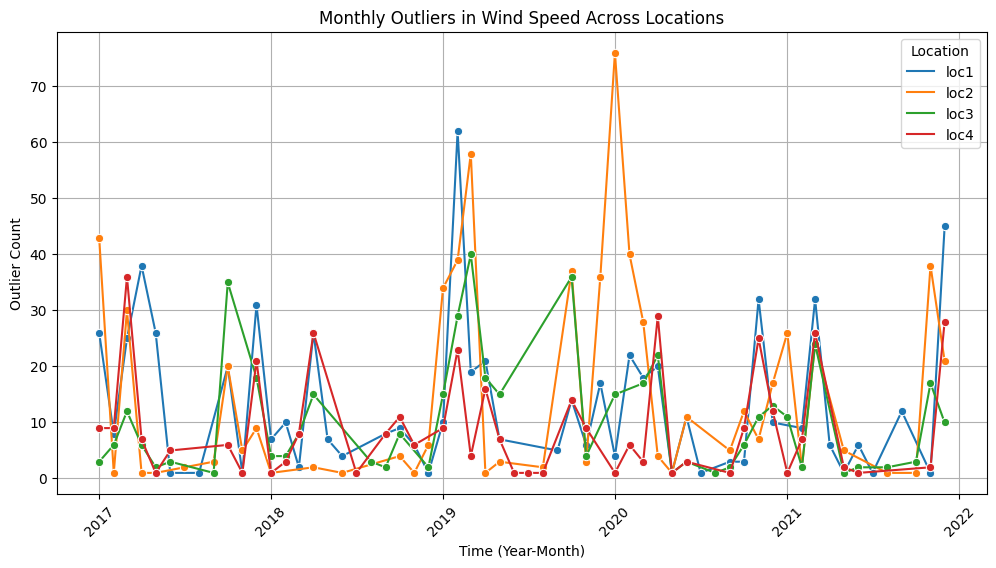

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count outliers based on IQR
def count_outliers(df, column, groupby_col):
    outlier_counts = {}
    
    for location in df[groupby_col].unique():
        loc_data = df[df[groupby_col] == location][column]
        Q1 = loc_data.quantile(0.25)
        Q3 = loc_data.quantile(0.75)
        IQR = Q3 - Q1

        # Outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = ((loc_data < lower_bound) | (loc_data > upper_bound)).sum()
        outlier_counts[location] = outlier_count

    return pd.DataFrame(list(outlier_counts.items()), columns=[groupby_col, 'Outlier Count'])

# Count outliers for wind speed across locations
wind_speed_outliers = count_outliers(data, 'windspeed_10m', 'Location')

# ✅ Display outlier counts
print("Wind Speed Outlier Counts:")
print(wind_speed_outliers)

# ------------------------------
# ✅ Outlier Tracking Over Time
# ------------------------------

# Identify outliers for wind speed with respect to time
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mark rows as outliers
    df['is_outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return df

# Apply outlier identification to wind speed data
data = data.groupby('Location', group_keys=False).apply(lambda x: identify_outliers(x, 'windspeed_10m'))

# Count outliers per month
monthly_outlier_counts = data[data['is_outlier']].groupby(['Month', 'Location']).size().reset_index(name='Outlier Count')

# Convert 'Month' to datetime for proper plotting
monthly_outlier_counts['Month'] = monthly_outlier_counts['Month'].astype(str)
monthly_outlier_counts['Month'] = pd.to_datetime(monthly_outlier_counts['Month'])

# ✅ Display monthly outliers over time
print("\nMonthly Wind Speed Outlier Counts:")
print(monthly_outlier_counts)

### === PLOTS === ###

# 1️⃣ Outliers Over Time (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_outlier_counts, x='Month', y='Outlier Count', hue='Location', marker='o')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Outlier Count")
plt.title("Monthly Outliers in Wind Speed Across Locations")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid(True)
plt.show()



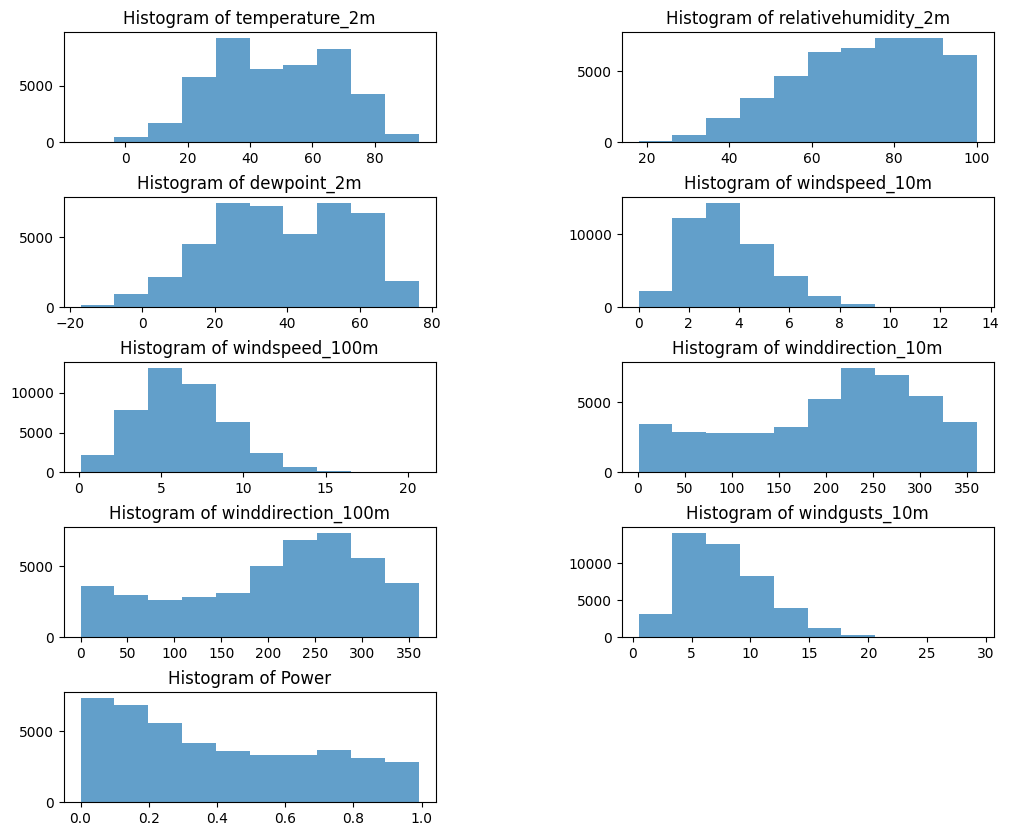

In [26]:
#Continuous variables distribution
var_ind = [1,2,3,4,5,6,7,8,9,10]
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 10):
    a = plot.add_subplot(5, 2, i)
    a.hist(loc1.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text('Histogram of ' + loc1.columns[var_ind[i - 1]])

In [27]:
#Correlation analysis
corr_table1 = round(loc1[['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']].corr(method = 'pearson'), 2)
corr_table1

,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
Power,1.00,-0.21,-0.07,-0.22,0.73,0.78,0.16,0.17,0.66
temperature_2m,-0.21,1.00,-0.14,0.93,-0.11,-0.17,-0.15,-0.15,-0.01
relativehumidity_2m,-0.07,-0.14,1.00,0.22,-0.22,-0.05,-0.08,-0.09,-0.34
dewpoint_2m,-0.22,0.93,0.22,1.00,-0.19,-0.18,-0.18,-0.18,-0.13
windspeed_10m,0.73,-0.11,-0.22,-0.19,1.00,0.93,0.17,0.18,0.94
windspeed_100m,0.78,-0.17,-0.05,-0.18,0.93,1.00,0.16,0.18,0.82
winddirection_10m,0.16,-0.15,-0.08,-0.18,0.17,0.16,1.00,0.90,0.16
winddirection_100m,0.17,-0.15,-0.09,-0.18,0.18,0.18,0.90,1.00,0.17
windgusts_10m,0.66,-0.01,-0.34,-0.13,0.94,0.82,0.16,0.17,1.00


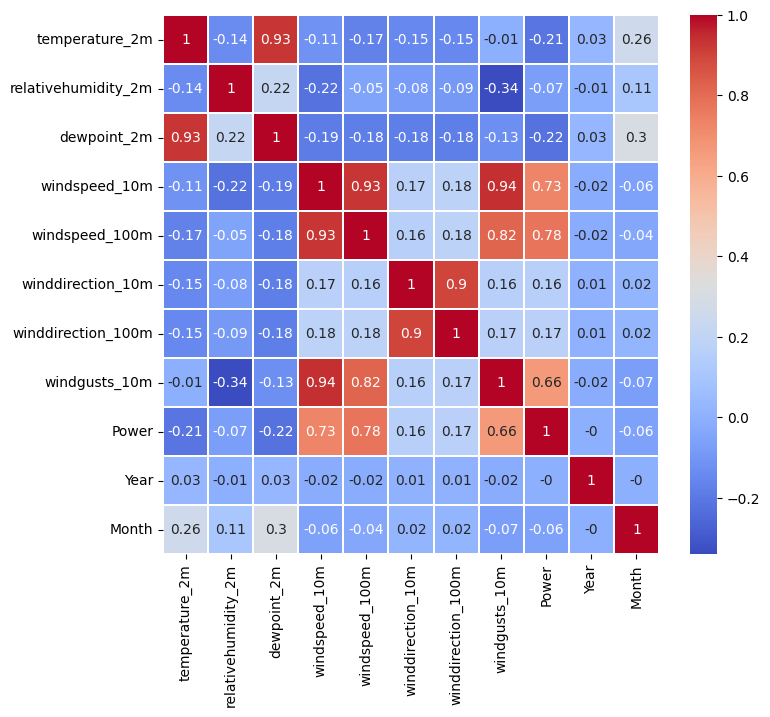

In [28]:
fig, axes = plt.subplots(figsize=(8,7))
corrdata=sns.heatmap(round(loc1.iloc[:,1:12].corr(),2), cmap='coolwarm', annot=True,linewidths=0.1)
plt.show()

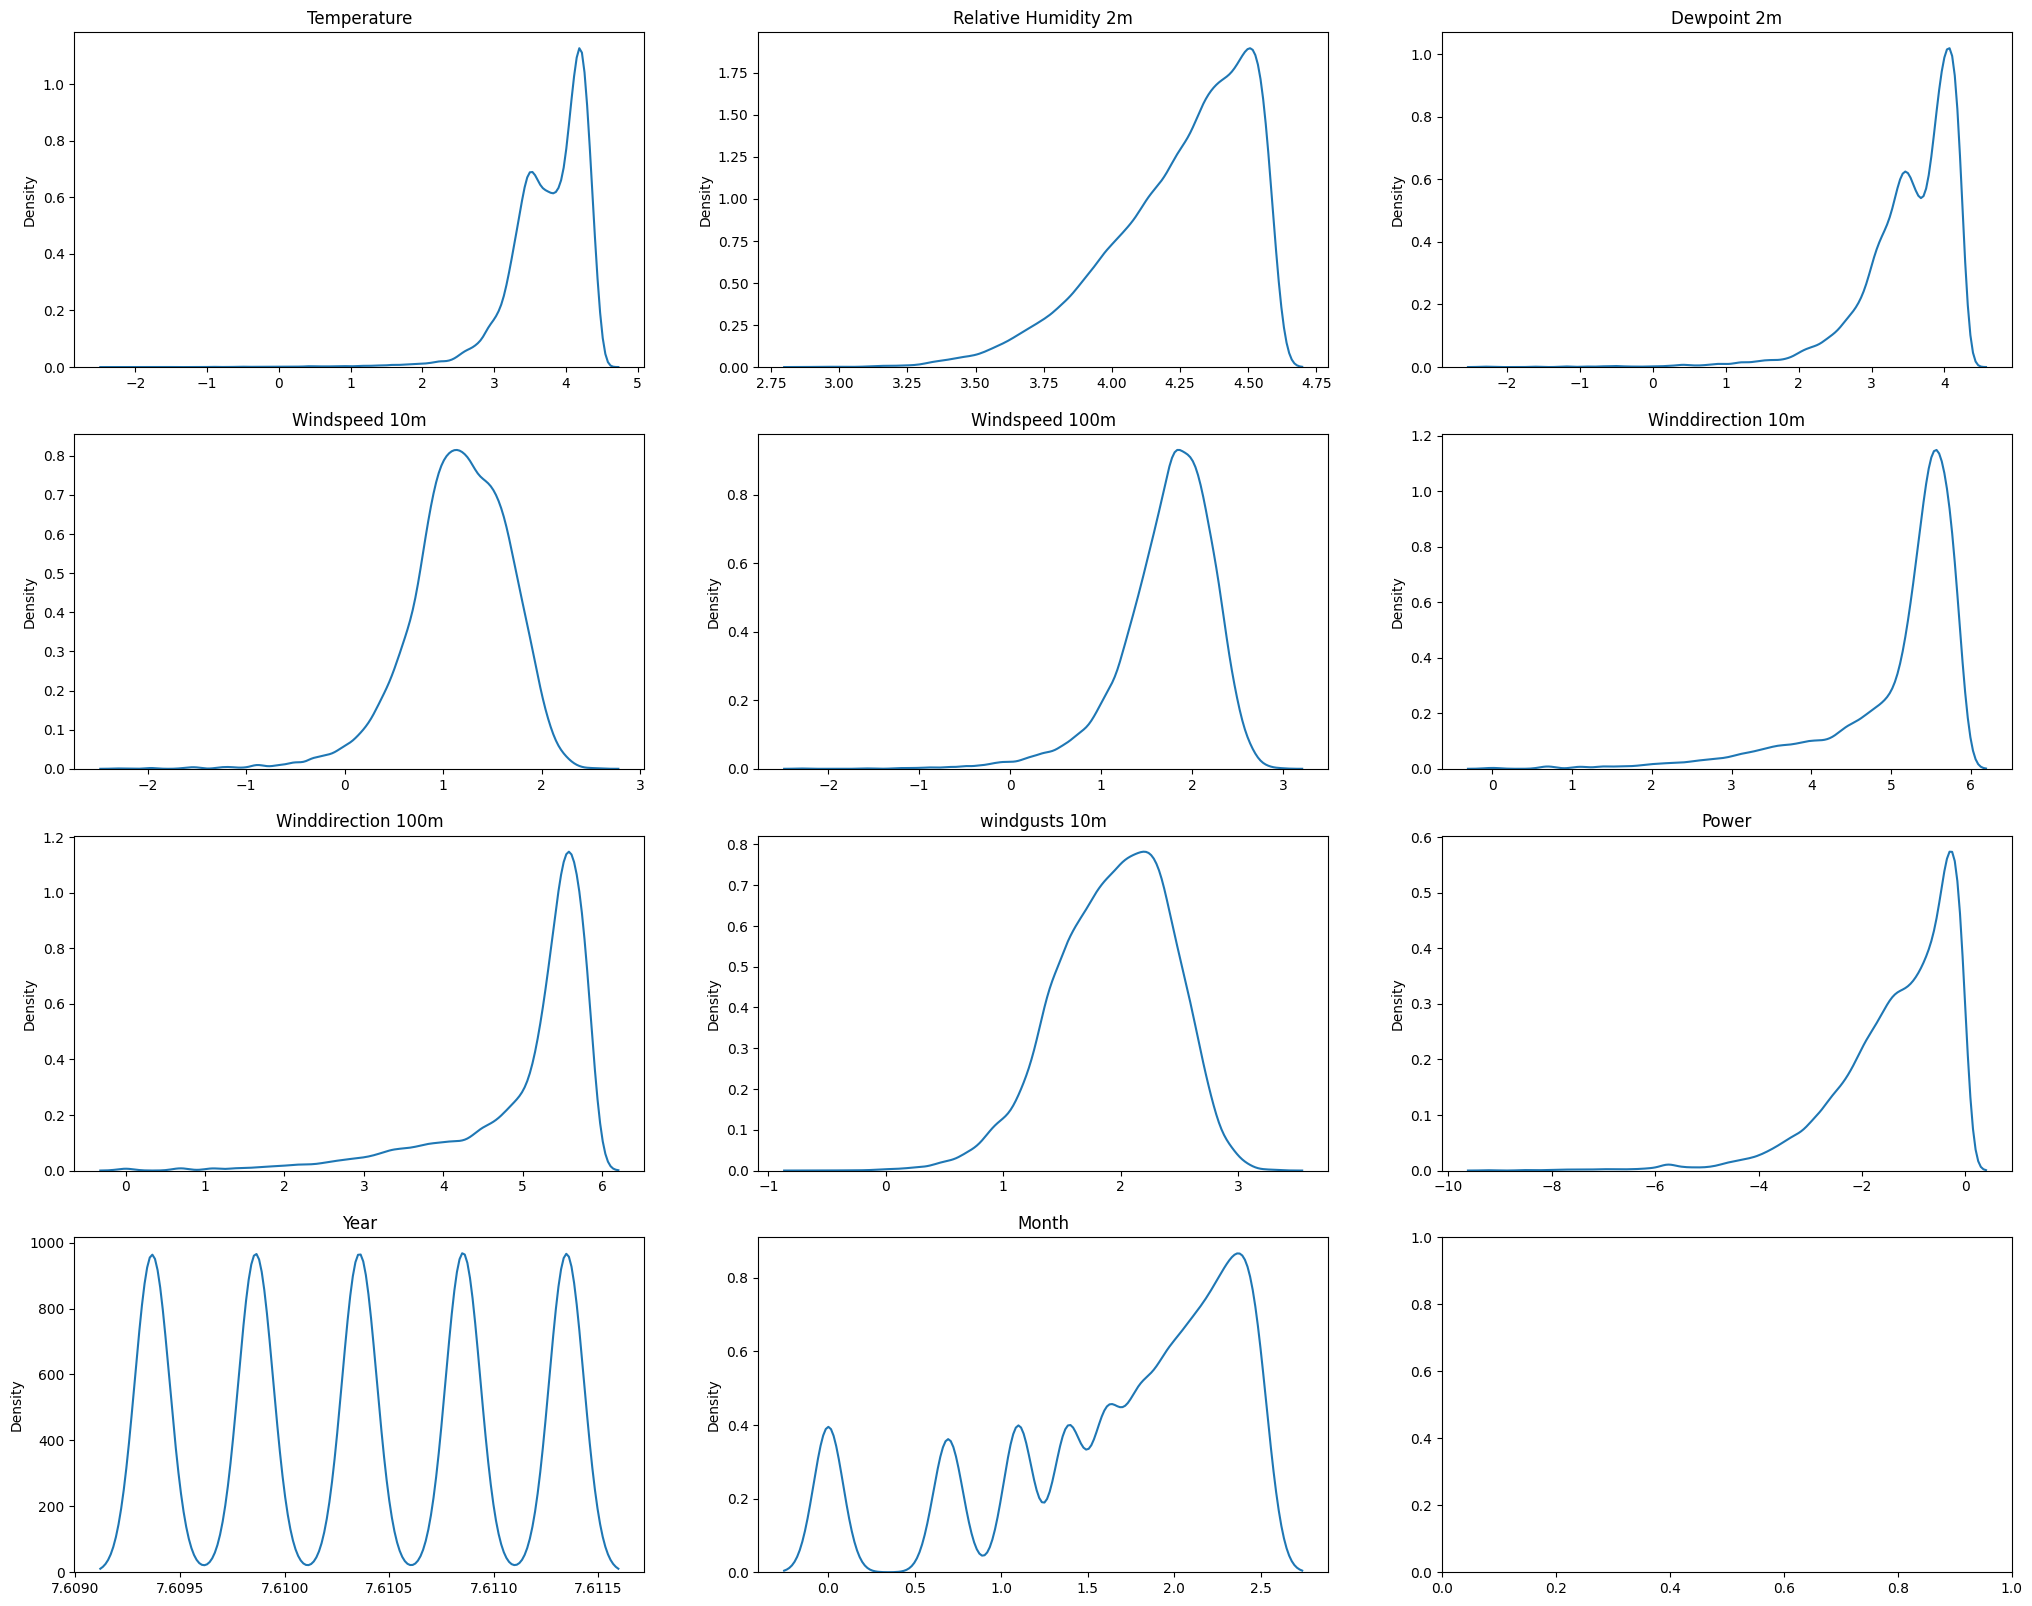

In [29]:
fig, axes = plt.subplots(4,3, figsize=(25,20))
sns.kdeplot(np.log(loc1['temperature_2m']),ax=axes[0,0]).set(xlabel='', title='Temperature')
sns.kdeplot(np.log(loc1['relativehumidity_2m']),ax=axes[0,1]).set(xlabel='', title='Relative Humidity 2m')
sns.kdeplot(np.log(loc1['dewpoint_2m']),ax=axes[0,2]).set(xlabel='', title='Dewpoint 2m')
sns.kdeplot(np.log(loc1['windspeed_10m']),ax=axes[1,0]).set(xlabel='', title='Windspeed 10m')
sns.kdeplot(np.log(loc1['windspeed_100m']),ax=axes[1,1]).set(xlabel='', title='Windspeed 100m')
sns.kdeplot(np.log(loc1['winddirection_10m']),ax=axes[1,2]).set(xlabel='', title='Winddirection 10m')
sns.kdeplot(np.log(loc1['winddirection_100m']),ax=axes[2,0]).set(xlabel='', title='Winddirection 100m')
sns.kdeplot(np.log(loc1['windgusts_10m']),ax=axes[2,1]).set(xlabel='', title='windgusts 10m')
sns.kdeplot(np.log(loc1['Power']),ax=axes[2,2]).set(xlabel='', title='Power')
sns.kdeplot(np.log(loc1['Year']),ax=axes[3,0]).set(xlabel='', title='Year')
sns.kdeplot(np.log(loc1['Month']),ax=axes[3,1]).set(xlabel='', title='Month')
plt.show()

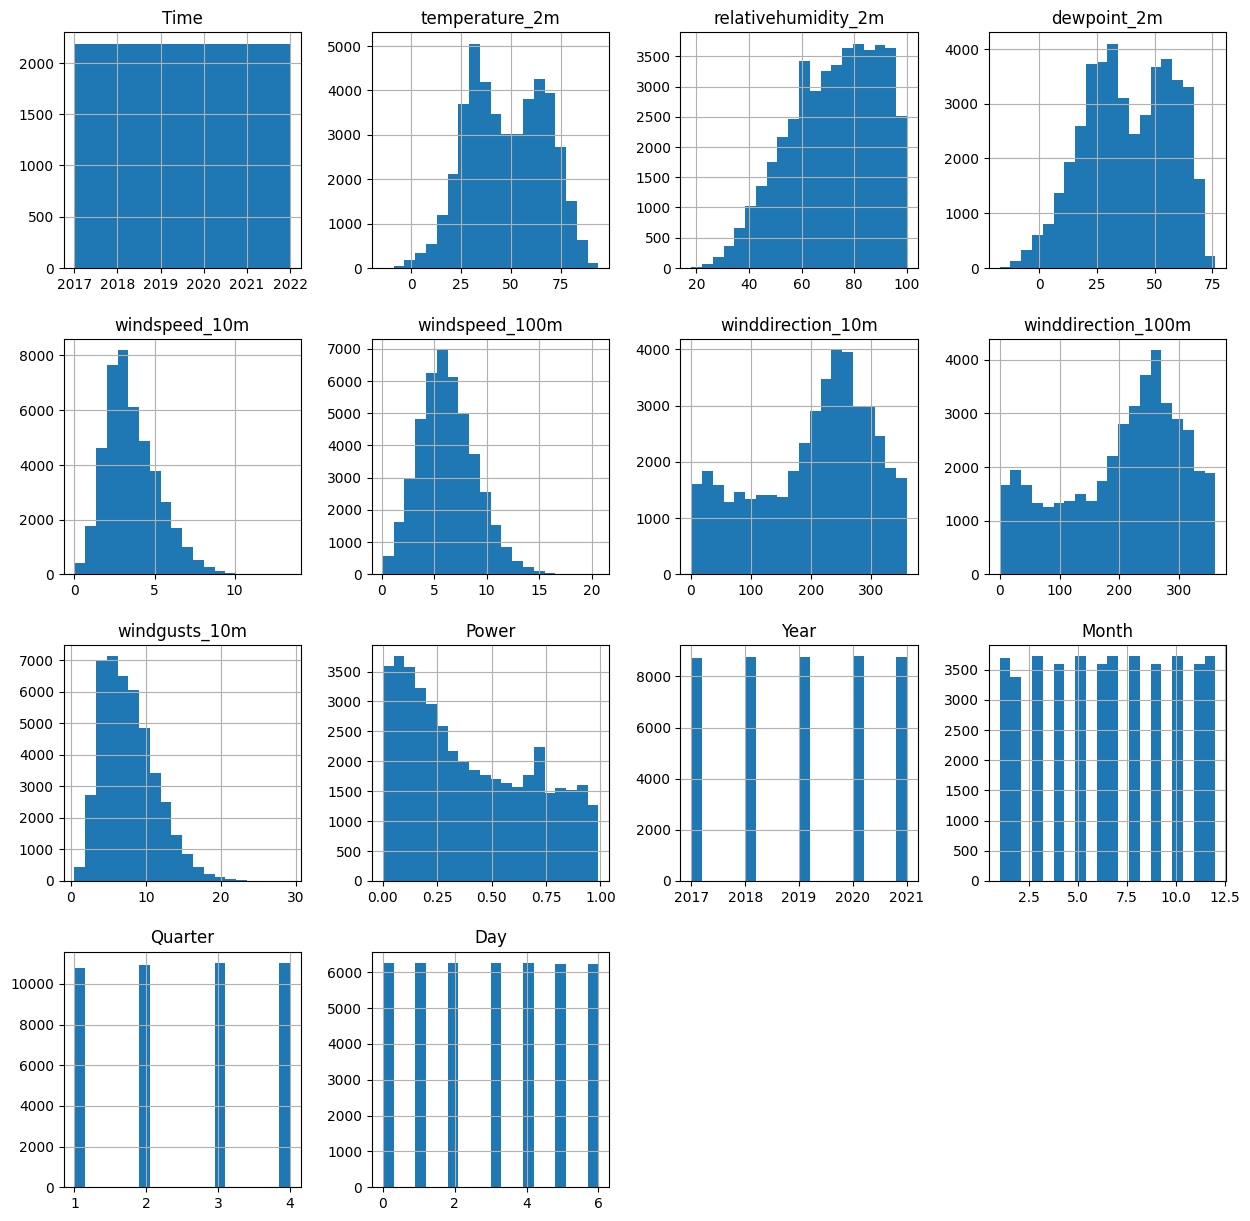

In [30]:
loc1.hist(bins=20, figsize=(15, 15))
plt.show()

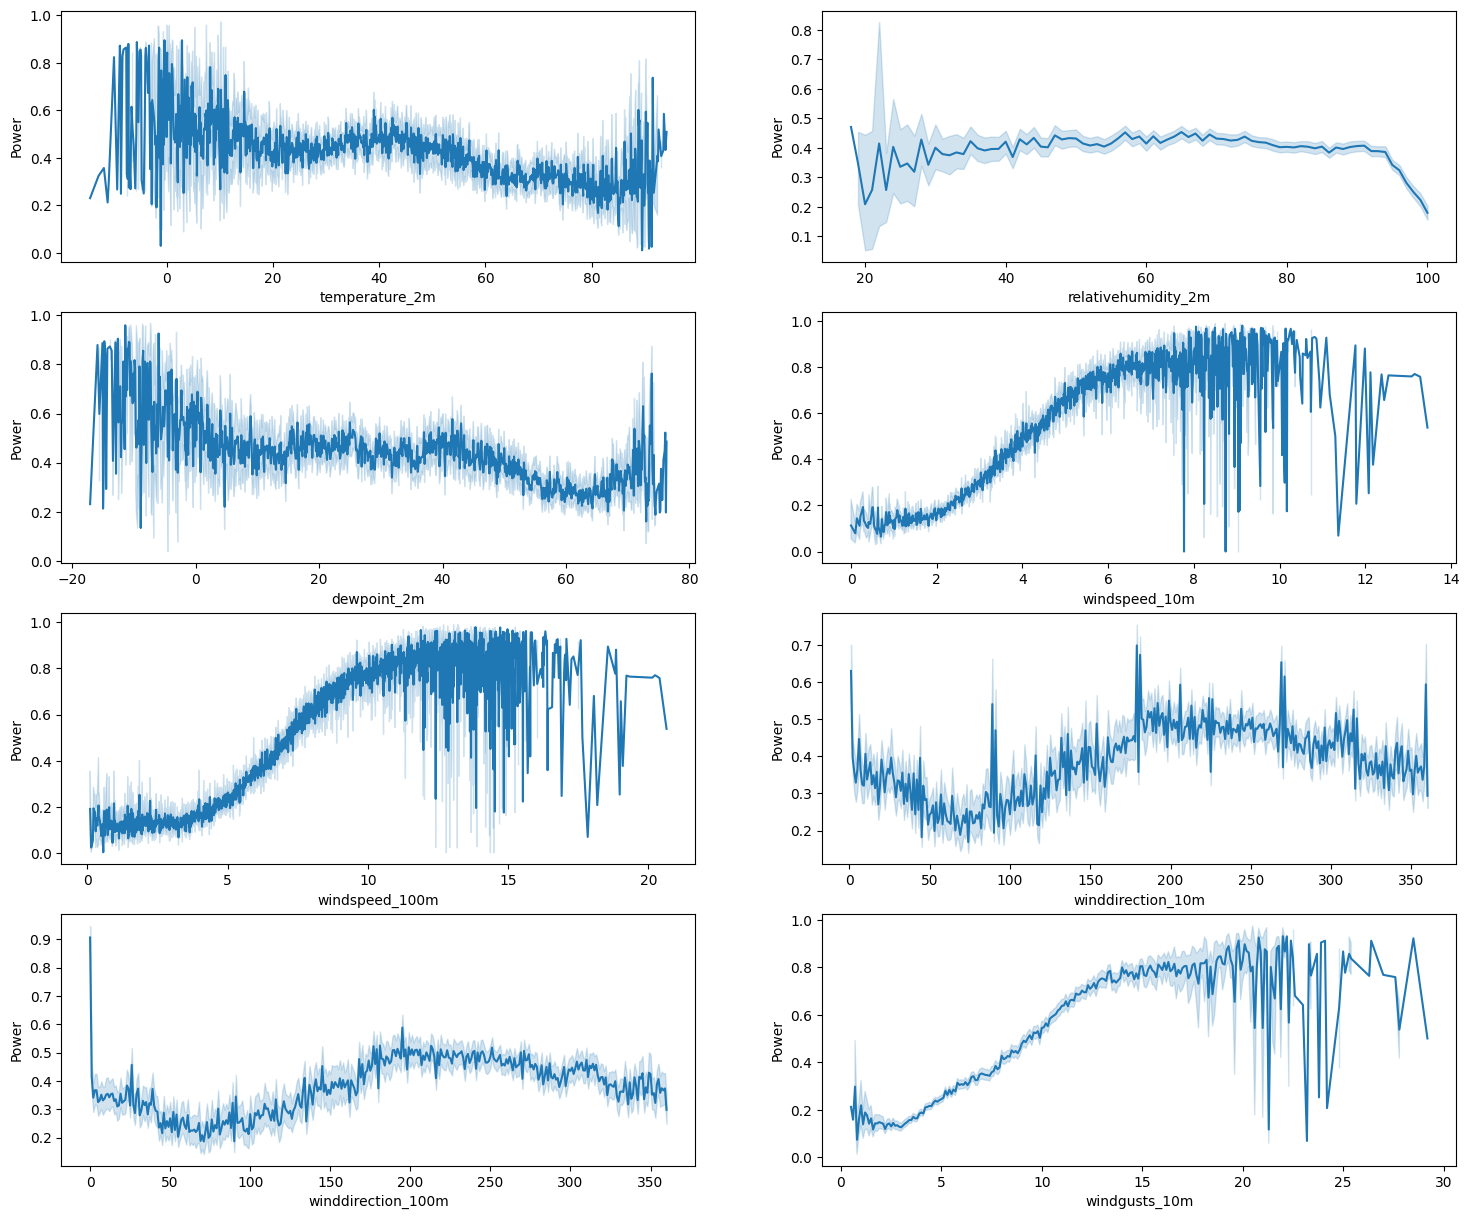

In [31]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
sns.lineplot(data=loc1, y= "Power",x="temperature_2m",palette = 'viridis',ax=axes[0,0]).set(xlabel='temperature_2m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "relativehumidity_2m",palette = 'deep',ax=axes[0,1]).set(xlabel='relativehumidity_2m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power",x= "dewpoint_2m",palette = 'viridis',ax=axes[1,0]).set(xlabel='dewpoint_2m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "windspeed_10m",palette = 'deep',ax=axes[1,1]).set(xlabel='windspeed_10m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "windspeed_100m",palette = 'viridis',ax=axes[2,0]).set(xlabel='windspeed_100m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "winddirection_10m",palette = 'deep',ax=axes[2,1]).set(xlabel='winddirection_10m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "winddirection_100m",palette = 'viridis',ax=axes[3,0]).set(xlabel='winddirection_100m',ylabel='Power')
sns.lineplot(data=loc1, y= "Power", x= "windgusts_10m",palette = 'deep',ax=axes[3,1]).set(xlabel='windgusts_10m',ylabel='Power')
plt.show()


<Axes: xlabel='Time'>

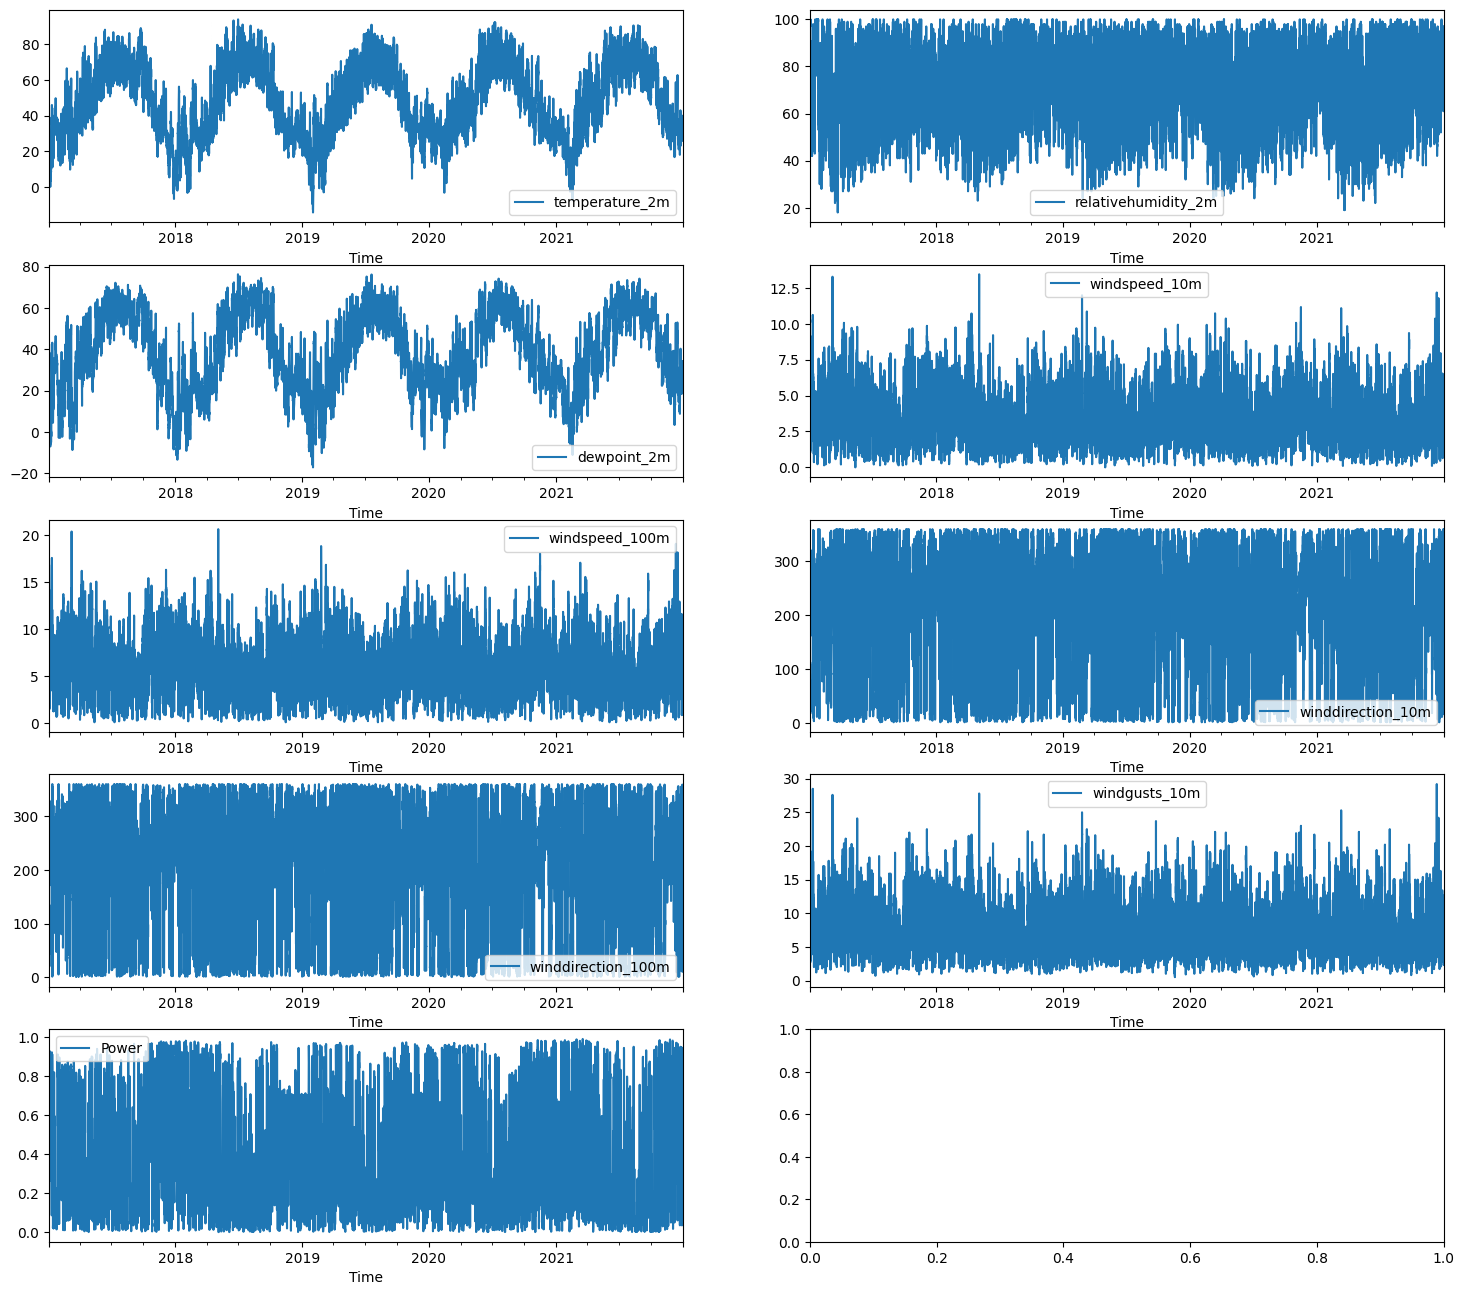

In [32]:

fig, axes = plt.subplots(5,2, figsize=(18,16))
loc1.plot('Time','temperature_2m',ax=axes[0,0])
loc1.plot('Time','relativehumidity_2m',ax=axes[0,1])
loc1.plot('Time','dewpoint_2m',ax=axes[1,0])
loc1.plot('Time','windspeed_10m',ax=axes[1,1])
loc1.plot('Time','windspeed_100m',ax=axes[2,0])
loc1.plot('Time','winddirection_10m',ax=axes[2,1])
loc1.plot('Time','winddirection_100m',ax=axes[3,0])
loc1.plot('Time','windgusts_10m',ax=axes[3,1])
loc1.plot('Time','Power',ax=axes[4,0])


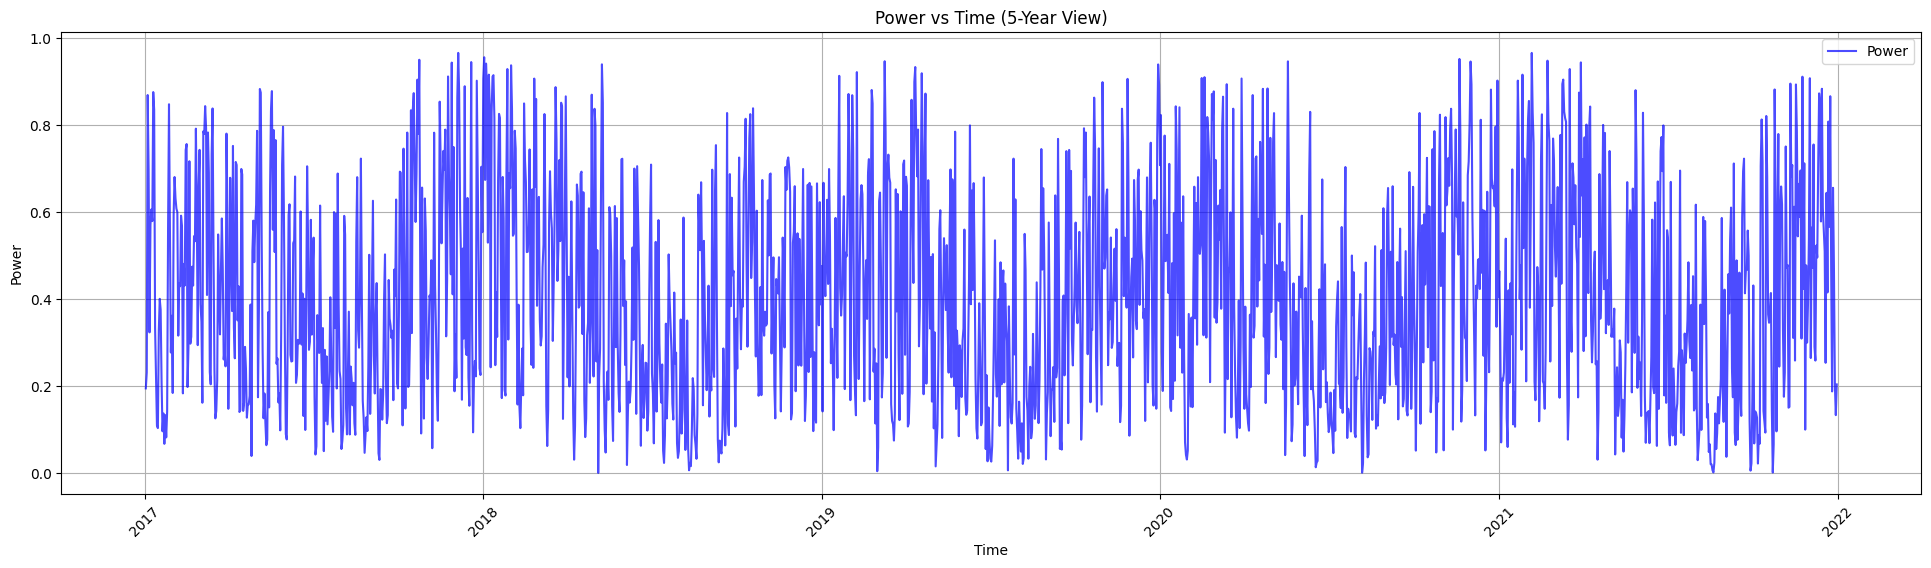

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Correct import for date handling

# Convert 'Time' column to datetime format
loc1['Time'] = pd.to_datetime(loc1['Time'])

# Optional: Resampling to reduce points (e.g., taking mean per day)
loc1_resampled = loc1.resample('D', on='Time').mean()

# Create the plot
plt.figure(figsize=(24, 6))
plt.plot(loc1_resampled.index, loc1_resampled['Power'], linestyle='-', color='b', alpha=0.7, label='Power')

# Formatting the plot
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Power vs Time (5-Year View)")

# Correctly set the X-axis ticks and labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show 1-year intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'

# Adjustments for readability
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


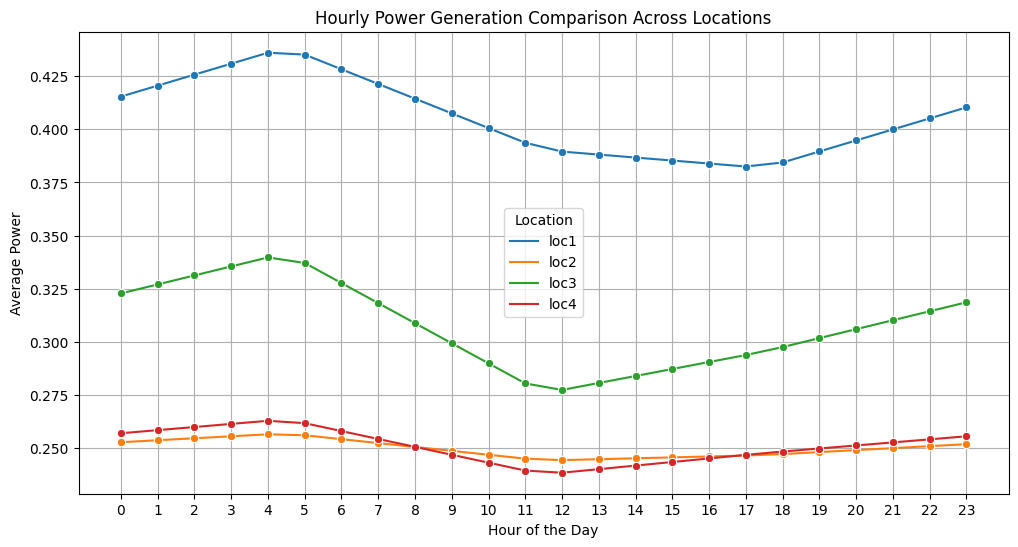

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the hour from the time column
data['Hour'] = data['Time'].dt.hour

# Compute the mean power per hour for each location
hourly_mean_power = data.groupby(['Hour', 'Location'])['Power'].mean().reset_index()

### === PLOTS === ###

# 1️⃣ Line Plot: Average Power Generation per Hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_mean_power, x='Hour', y='Power', hue='Location', marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Power")
plt.title("Hourly Power Generation Comparison Across Locations")
plt.xticks(range(0, 24))
plt.legend(title="Location")
plt.grid(True)
plt.show()

